1. Explore dataset – correlation between features, their impact on target, independence assumptions
2. Try multiple visualization strategies: correlation plots, dimensionality reduction approaches – PCA, UMAP, t-SNE. Explain gained insights
3. Explore data using unsupervised learning techniques
4. Identify appropriate cross-validation strategy
5. Train a simple model first. Use validation set for hyperparameter tuning and/or early stopping. Analyze its performance using cross-validation. Identify potential pitfalls.
6. Propose ways to improve performance – e.g., feature selection, regularization, increasing model complexity. Conduct at least 2 more experiments


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder

In [28]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.info()
# data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
# data.isnull().sum()
# data.info()
data['bmi'] = data['bmi'].replace(to_replace=np.nan, value=data['bmi'].mean())
# data.isnull().sum()
X = data.drop(columns=['stroke'])  # Drop the target column 'stroke' from features
y = data['stroke'] 

y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

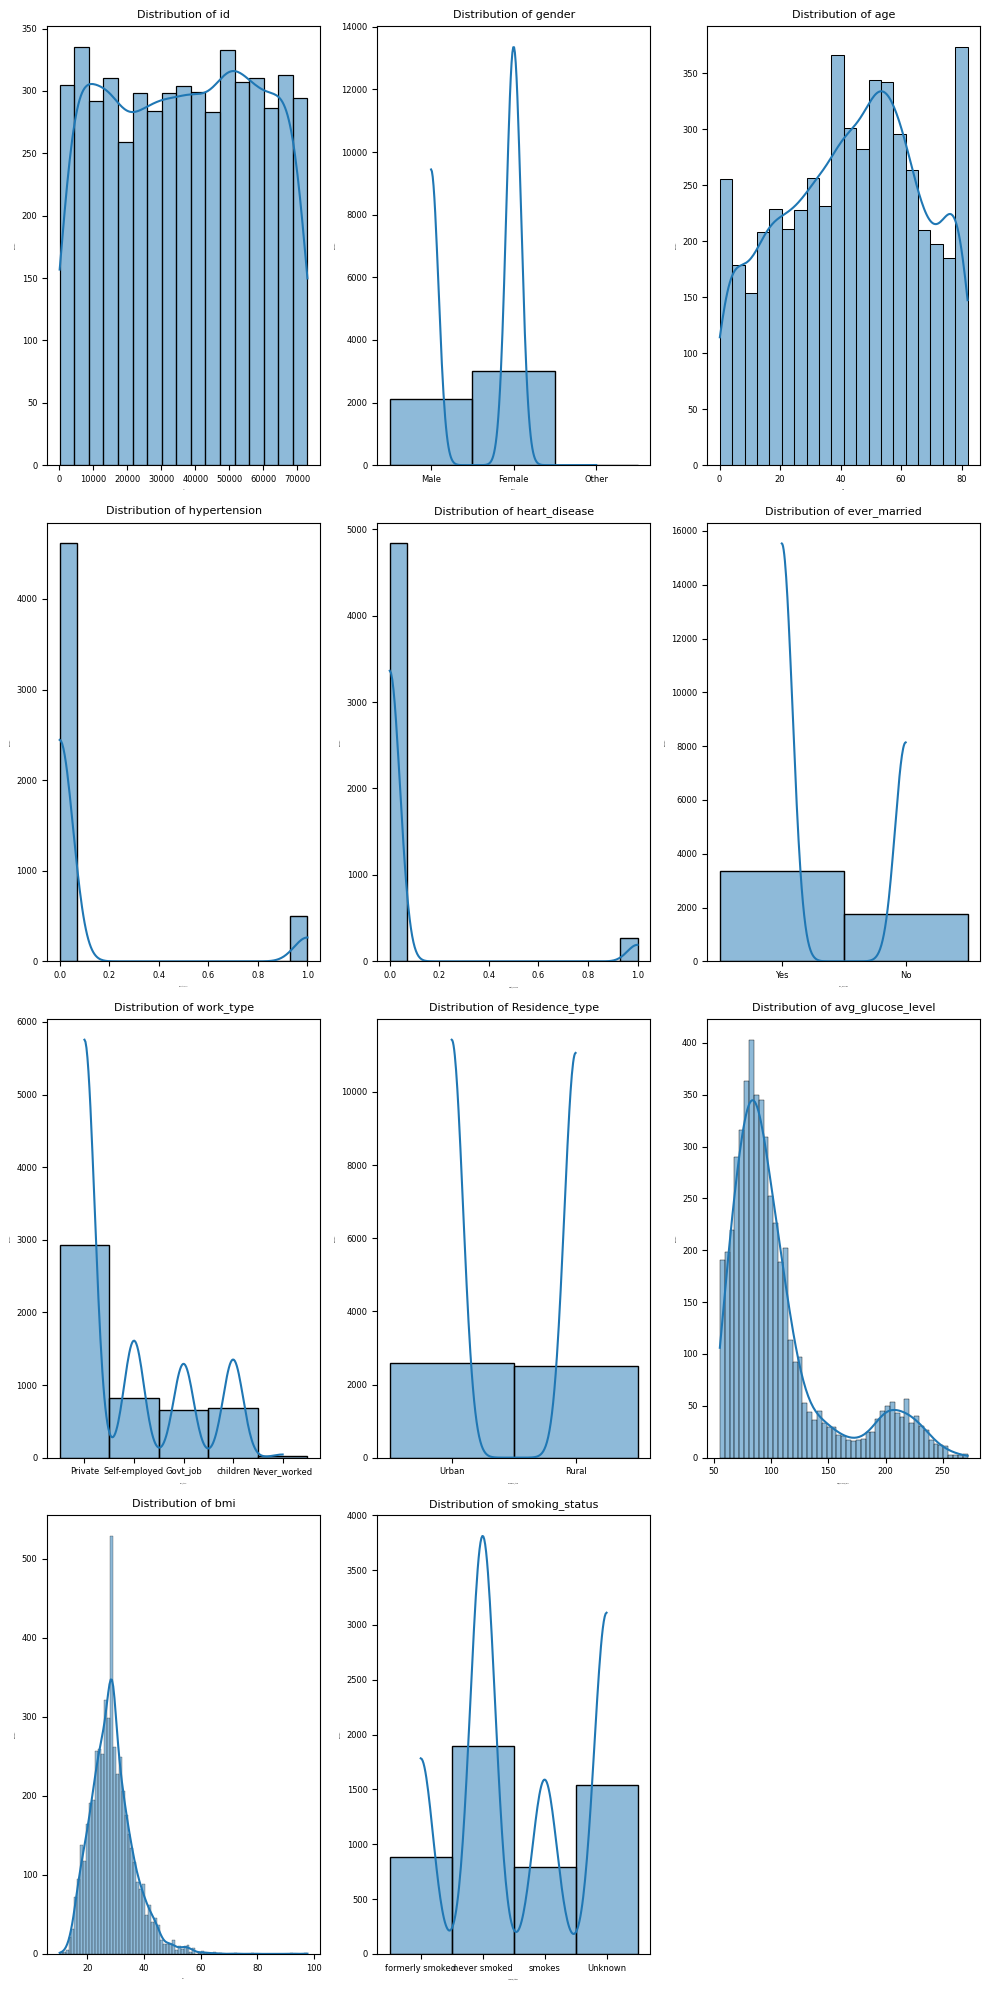

In [36]:
# Exploring distribution of the data
num_features = X.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Calculates rows to fit all features

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 20))
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(X.columns):
    sns.histplot(X[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=8)
    axes[i].set_xlabel(column, fontsize=0)
    axes[i].set_ylabel('Frequency', fontsize=0)
    axes[i].tick_params(axis='both', labelsize=6)

# Hide any extra subplots if there are fewer than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

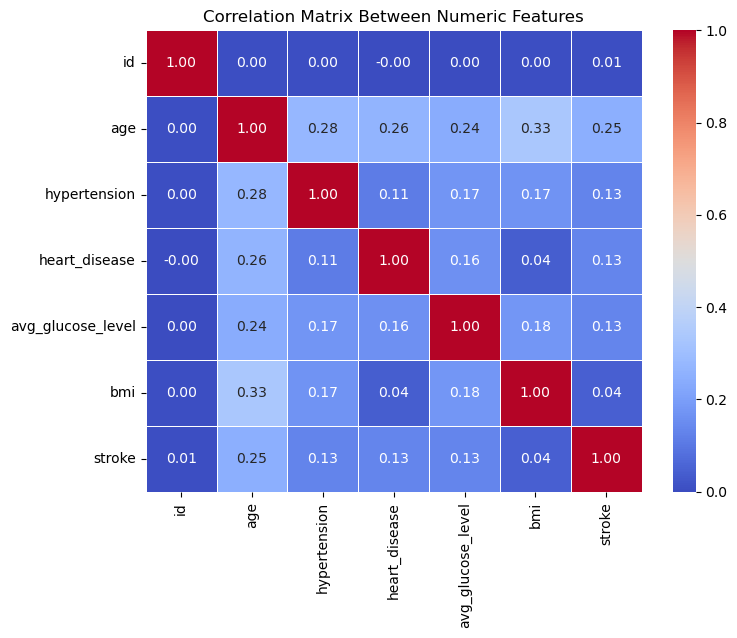

In [31]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Between Numeric Features")
plt.show()

In [33]:
# Analyze feature impact on target ('stroke') using Chi-square test for categorical features
impact_results = {}
for column in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    contingency_table = pd.crosstab(data[column], data['stroke'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    impact_results[column] = p

print("P-values for each feature's impact on the target ('stroke'):")
for feature, p_value in impact_results.items():
    print(f"{feature}: p-value = {p_value:.4f}")

P-values for each feature's impact on the target ('stroke'):
gender: p-value = 0.7895
hypertension: p-value = 0.0000
heart_disease: p-value = 0.0000
ever_married: p-value = 0.0000
work_type: p-value = 0.0000
Residence_type: p-value = 0.2983
smoking_status: p-value = 0.0000


In [34]:
# 3. Independence assumptions using Chi-square for feature pairs
independence_results = {}
for i, column1 in enumerate(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']):
    for column2 in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'][i+1:]:
        contingency_table = pd.crosstab(data[column1], data[column2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        independence_results[(column1, column2)] = p

# Display the p-values for independence tests between feature pairs
print("\nP-values for independence tests between feature pairs:")
for (feature1, feature2), p_value in independence_results.items():
    print(f"Between {feature1} and {feature2}: p-value = {p_value:.4f}")


P-values for independence tests between feature pairs:
Between gender and hypertension: p-value = 0.2998
Between gender and heart_disease: p-value = 0.0000
Between gender and ever_married: p-value = 0.0377
Between gender and work_type: p-value = 0.0000
Between gender and Residence_type: p-value = 0.5425
Between gender and smoking_status: p-value = 0.0000
Between hypertension and heart_disease: p-value = 0.0000
Between hypertension and ever_married: p-value = 0.0000
Between hypertension and work_type: p-value = 0.0000
Between hypertension and Residence_type: p-value = 0.6041
Between hypertension and smoking_status: p-value = 0.0000
Between heart_disease and ever_married: p-value = 0.0000
Between heart_disease and work_type: p-value = 0.0000
Between heart_disease and Residence_type: p-value = 0.8736
Between heart_disease and smoking_status: p-value = 0.0000
Between ever_married and work_type: p-value = 0.0000
Between ever_married and Residence_type: p-value = 0.6759
Between ever_married